In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Cargar los datos
df = pd.read_csv('/Users/anayaguemolina/Desktop/Trabajo Fin de Grado/BBDD/AndujarTempTiendas_def.csv', encoding="latin-1")

# Preprocesar los datos
df = df.dropna(subset=['CANTIDAD_TOTAL', 'T.Max', 'T.Min', 'Precipitaciones'])

# Dividir los datos en entrenamiento y prueba
n = int(len(df) * 0.8)
train = df.iloc[:n]
test = df.iloc[n:]

# Definir el modelo ARIMAX
model = SARIMAX(train['CANTIDAD_TOTAL'],
                exog=train[['T.Max', 'T.Min', 'Precipitaciones']],
                order=(1, 0, 2),
                seasonal_order=(0, 1, 1, 12))

# Ajustar el modelo
results = model.fit()

# Obtener AIC y BIC
aic = results.aic
bic = results.bic

# Preparar los datos exógenos de prueba
exog_test = test[['T.Max', 'T.Min', 'Precipitaciones']]
num_predictions = len(exog_test)  # Número real de predicciones que se pueden hacer

# Ajustar el rango de predicción a los datos exógenos disponibles
start_pred = test.index[0]
end_pred = start_pred + num_predictions - 1

# Predicciones
predicciones = results.predict(start=start_pred, end=end_pred, exog=exog_test)

# Calcular el RMSE
rmse = np.sqrt(mean_squared_error(test['CANTIDAD_TOTAL'].iloc[:num_predictions], predicciones))

# Imprimir las métricas
print(f'AIC: {aic}')
print(f'BIC: {bic}')
print(f'RMSE: {rmse}')

# Gráfico de las predicciones y los valores reales
plt.figure(figsize=(10,5))
plt.plot(test['CANTIDAD_TOTAL'].index, test['CANTIDAD_TOTAL'], label='Real')
plt.plot(test['CANTIDAD_TOTAL'].index, predicciones, color='red', label='Predicción ARIMAX')
plt.title('Comparación de las Cantidad Total Real vs. Predicción ARIMAX')
plt.xlabel('Índice')
plt.ylabel('Cantidad Total')
plt.legend()
plt.show()


/Users/anayaguemolina/Desktop/Trabajo Fin de Grado/entorno/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/anayaguemolina/Desktop/Trabajo Fin de Grado/entorno/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/anayaguemolina/Desktop/Trabajo Fin de Grado/entorno/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/anayaguemolina/Desktop/Trabajo Fin de Grado/entorno/l

ValueError: Provided exogenous values are not of the appropriate shape. Required (156, 3), got (144, 3).

/Users/anayaguemolina/Desktop/Trabajo Fin de Grado/entorno/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/anayaguemolina/Desktop/Trabajo Fin de Grado/entorno/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/anayaguemolina/Desktop/Trabajo Fin de Grado/entorno/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/anayaguemolina/Desktop/Trabajo Fin de Grado/entorno/l

AIC: 3617.838638965801
BIC: 3652.4906537649504
RMSE: 5.4579804765982605


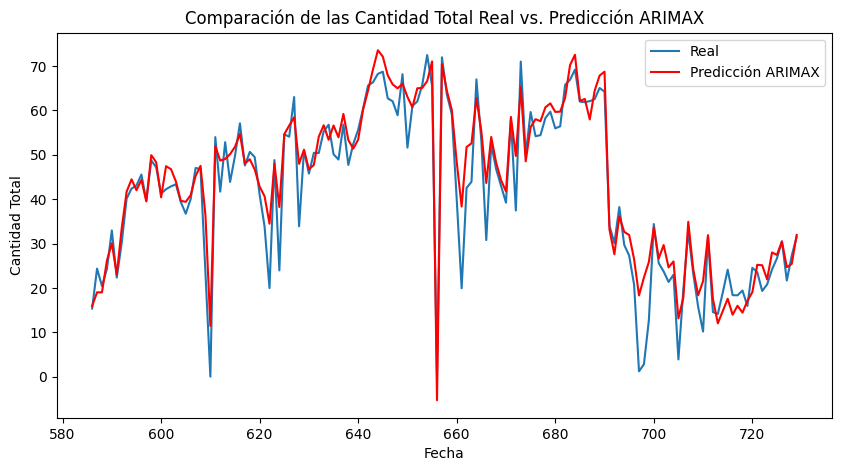

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Cargar los datos
df = pd.read_csv('/Users/anayaguemolina/Desktop/Trabajo Fin de Grado/BBDD/AndujarTempTiendas_def.csv', encoding="latin-1")

# Convertir la fecha a un índice de tiempo si es posible
if 'Fecha' in df.columns:
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    df.set_index('Fecha', inplace=True)

# Preprocesar los datos
df = df.dropna(subset=['CANTIDAD_TOTAL', 'T.Max', 'T.Min', 'Precipitaciones'])

# Dividir los datos en entrenamiento y prueba
n = int(len(df) * 0.8)
train = df.iloc[:n]
test = df.iloc[n:]

# Definir el modelo ARIMAX
model = SARIMAX(train['CANTIDAD_TOTAL'],
                exog=train[['T.Max', 'T.Min', 'Precipitaciones']],
                order=(1, 0, 2),
                seasonal_order=(0, 1, 1, 12))

# Ajustar el modelo
results = model.fit()

# Preparar los datos exógenos de prueba
exog_test = test[['T.Max', 'T.Min', 'Precipitaciones']]

# Predicciones
predicciones = results.get_forecast(steps=len(test), exog=exog_test)
forecast = predicciones.predicted_mean

# Calcular el RMSE
rmse = np.sqrt(mean_squared_error(test['CANTIDAD_TOTAL'], forecast))

# Imprimir las métricas
aic = results.aic
bic = results.bic
print(f'AIC: {aic}')
print(f'BIC: {bic}')
print(f'RMSE: {rmse}')

# Gráfico de las predicciones y los valores reales
plt.figure(figsize=(10,5))
plt.plot(test['CANTIDAD_TOTAL'].index, test['CANTIDAD_TOTAL'], label='Real')
plt.plot(test['CANTIDAD_TOTAL'].index, forecast, color='red', label='Predicción ARIMAX')
plt.title('Comparación de las Cantidad Total Real vs. Predicción ARIMAX')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Total')
plt.legend()
plt.show()
